In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import importlib
import utils

pd.set_option('display.max_columns', None)
plt.rcParams["figure.figsize"] = (20,7)

In [2]:
def get_date_column(df):
    df["year"] = ext_data["year"]
    df["month"] = ext_data["quarter"].map({"1": 1, "2": 4, "3": 7, "4": 10})
    df["date"] = pd.to_datetime(dict(year=df["year"], month=df["month"], day=1))
    df = df.drop(["month"], axis=1)
    return df

def prepare_concept(ext_data):
    df = ext_data[["year", "quarter"]]
    df = get_date_column(df).drop_duplicates().drop(["year", "quarter"], axis=1)
    return df

def add_countries_concept(df, concept):
    for country in ext_data["country"].unique():
        df = pd.merge(df, 
                       ext_data[ext_data["country"] == country][["date", concept]].rename(columns={concept: country}), 
                       on="date")
    df = df.set_index("date")
    return df

For Canada Real GDP, had to bring values from initial raw file

## Covers extended data (up to 2020, with addition of Brazil, Korea, Mexico)

In [3]:
path_additional_data = "/Users/victorgraff/Documents/2022:2023 ENSAE/Cours/Statapps/data_StatApp/Data_20_03.csv"
ext_data = pd.read_csv(path_additional_data)
#ext_data.loc[ext_data["country"] == "China", "country"] = "China, P.R.: Hong Kong"
ext_data = ext_data.drop(["exptoch", "impfrch"], axis=1)
ext_data.loc[ext_data["country"] == "Netherlands", "country"] = "NetherlandsThe"
ext_data.loc[ext_data["country"] == "New Zealand", "country"] = "NewZealand"
ext_data.loc[ext_data["country"] == "United Kingdom", "country"] = "UnitedKingdom"
ext_data.loc[ext_data["country"] == "United States", "country"] = "UnitedStates"
ext_data.loc[ext_data["country"] == "Korea", "country"] = "Korea, Rep. of"

In [564]:
abreviations = {
    "Australia": "as",
    "Austria": "au",
    "Belgium": "be",
    "Brazil": "br",
    "Canada": "ca",
    #"China, P.R.: Hong Kong": "ch",
    "Denmark": "de",
    "Finland": "fi",
    "France": "fr",
    "Germany": "gr",
    "Greece": "gc",
    "Ireland": "ir",
    "Italy": "it",
    "Japan": "ja",
    "Korea, Rep. of": "ko",
    "Mexico": "me",
    "NetherlandsThe": "nt",
    "NewZealand": "nz",
    "Norway": "no",
    "Portugal": "po",
    "Spain": "sp",
    "Sweden": "sw",
    "Switzerland": "sz",
    "UnitedKingdom": "uk",
    "UnitedStates": "us",
}

abreviation_inverse = {v: k for k, v in abreviations.items()}
list_countries = list(abreviations.keys())

In [565]:
ext_data["quarter"] = ext_data["year"].astype(str).str[-1]
ext_data["year"] = ext_data["year"].astype(str).str[:4]

### Initial processing of data to achieve same format as original data

In [347]:
dict_import = dict()
dict_export = dict()
for country in abreviations.keys():
    dict_import[country] = pd.DataFrame()
    dict_export[country] = pd.DataFrame()
    
    df_country = ext_data[ext_data["country"] == country]
    df_country = df_country.rename(columns={"exptomex": "exptome"})
    
    for column in df_country.columns:
        if column[:3] == "imp":
            dict_import[country][abreviation_inverse[column[-2:]]] = df_country[column]
        elif column[:3] == "exp":
            dict_export[country][abreviation_inverse[column[-2:]]] = df_country[column]
    dict_import[country]["World"] = df_country["totimp"]
    dict_export[country]["World"] = df_country["totexp"]
    dict_import[country]["quarter"] = df_country["quarter"]
    dict_export[country]["quarter"] = df_country["quarter"]
    dict_import[country]["year"] = df_country["year"].astype(int)
    dict_export[country]["year"] = df_country["year"].astype(int)
    dict_import[country] = dict_import[country][dict_import[country]["quarter"] == "1"].set_index("year").loc[1960:2020]
    dict_export[country] = dict_export[country][dict_export[country]["quarter"] == "1"].set_index("year").loc[1960:2020]
    

In [348]:
path_nominal_GDP = "data_StatApp/imf/NominalGDP.xls"
xls_nominalGDP = pd.ExcelFile(path_nominal_GDP)
nominalGDP = pd.read_excel(xls_nominalGDP, 'Sheet1')

path_real_GDP = "/Users/victorgraff/Documents/2022:2023 ENSAE/Cours/Statapps/data_StatApp/imf/real_GDP_corrected.csv"
real_GDP = pd.read_csv(path_real_GDP, on_bad_lines='skip').T

In [349]:
nominalGDP = utils.process_nominal_GDP(nominalGDP)
real_GDP = utils.process_real_GDP(real_GDP)
real_GDP_yearly = real_GDP.groupby("year").sum()

real_GDP_yearly = real_GDP_yearly.loc[1960:2020]

real_GDP_yearly = real_GDP_yearly.replace(0.0, np.nan)

real_GDP = real_GDP[list_countries]


In [352]:
trade_activity_countries = utils.get_trade_activity_countries(list_countries, dict_export, dict_import, real_GDP_yearly, nominalGDP)


Australia Austria
Australia Belgium
Australia Brazil
Australia Canada
Australia Denmark
Australia Finland
Australia France
Australia Germany
Australia Greece
Australia Ireland
Australia Italy
Australia Japan
Australia Korea, Rep. of
Australia Mexico
Australia NetherlandsThe
Australia NewZealand
Australia Norway
Australia Portugal
Australia Spain
Australia Sweden
Australia Switzerland
Australia UnitedKingdom
Australia UnitedStates
Austria Australia
Austria Belgium
Austria Brazil
Austria Canada
Austria Denmark
Austria Finland
Austria France
Austria Germany
Austria Greece
Austria Ireland
Austria Italy
Austria Japan
Austria Korea, Rep. of
Austria Mexico
Austria NetherlandsThe
Austria NewZealand
Austria Norway
Austria Portugal
Austria Spain
Austria Sweden
Austria Switzerland
Austria UnitedKingdom
Austria UnitedStates
Belgium Australia
Belgium Austria
Belgium Brazil
Belgium Canada
Belgium Denmark
Belgium Finland
Belgium France
Belgium Germany
Belgium Greece
Belgium Ireland
Belgium Italy
Belg

Sweden Portugal
Sweden Spain
Sweden Switzerland
Sweden UnitedKingdom
Sweden UnitedStates
Switzerland Australia
Switzerland Austria
Switzerland Belgium
Switzerland Brazil
Switzerland Canada
Switzerland Denmark
Switzerland Finland
Switzerland France
Switzerland Germany
Switzerland Greece
Switzerland Ireland
Switzerland Italy
Switzerland Japan
Switzerland Korea, Rep. of
Switzerland Mexico
Switzerland NetherlandsThe
Switzerland NewZealand
Switzerland Norway
Switzerland Portugal
Switzerland Spain
Switzerland Sweden
Switzerland UnitedKingdom
Switzerland UnitedStates
UnitedKingdom Australia
UnitedKingdom Austria
UnitedKingdom Belgium
UnitedKingdom Brazil
UnitedKingdom Canada
UnitedKingdom Denmark
UnitedKingdom Finland
UnitedKingdom France
UnitedKingdom Germany
UnitedKingdom Greece
UnitedKingdom Ireland
UnitedKingdom Italy
UnitedKingdom Japan
UnitedKingdom Korea, Rep. of
UnitedKingdom Mexico
UnitedKingdom NetherlandsThe
UnitedKingdom NewZealand
UnitedKingdom Norway
UnitedKingdom Portugal
Unite

In [355]:
dy_df = utils.get_trade_aggregations(list_countries, trade_activity_countries)
dy_df.head()

,country_1,country_2,period,wt,wy_real,wy_nominal,wm,wx
0,Australia,Austria,1,0.000370,NaN,NaN,0.000507,0.000212
0,Australia,Austria,2,0.000250,NaN,NaN,0.000420,0.000063
0,Australia,Austria,3,0.000206,NaN,NaN,0.000343,0.000045
0,Australia,Austria,4,0.000276,NaN,NaN,0.000464,0.000057
0,Australia,Belgium,1,0.001253,NaN,NaN,0.000695,0.001843


## Again, comparison with Frankel Rose final data

In [356]:
FR_data_path = "/Users/victorgraff/Documents/2022:2023 ENSAE/Cours/Statapps/data_StatApp/Data_FrankelRose.csv"
FR_data = pd.read_csv(FR_data_path)

In [358]:
countries_mapping = {
    "134": "Germany",
    "111": "UnitedStates",
    "132": "France",
    "193": "Australia",
    "156": "Canada",
    "112": "UnitedKingdom",
    "122": "Austria",
    "124": "BelgiumLuxembourg",
    "138": "NetherlandsThe",
    "136": "Italy",
    "124": "Belgium",
    "128": "Denmark",
    "142": "Norway",
    "144": "Sweden",
    "146": "Switzerland",
    "158": "Japan",
    "174": "Greece",
    "172": "Finland",
    "184": "Spain",
    "178": "Ireland",
    "182": "Portugal",
    "196": "NewZealand"
}

In [359]:
FR_data["count1"] = FR_data["count1"].astype(str)
FR_data["count2"] = FR_data["count2"].astype(str)
FR_data["count1"] = FR_data["count1"].replace(countries_mapping)
FR_data["count2"] = FR_data["count2"].replace(countries_mapping)
FR_data = FR_data.rename(columns={"count1": "country_1", "count2": "country_2"})

In [360]:
df_compare = pd.merge(FR_data[["period", "country_1", "country_2", "wx", "wm", "wt"]], dy_df, on=["period", "country_1", "country_2"])

df_compare["pairs"] = df_compare["country_1"] + "-" + df_compare["country_2"]

In [361]:
df_compare.head()

,period,country_1,country_2,wx_x,wm_x,wt_x,wt_y,wy_real,wy_nominal,wm_y,wx_y,pairs
0,1,UnitedStates,UnitedKingdom,0.063912,0.061481,0.062750,0.009723,0.000157,NaN,0.009435,0.009990,UnitedStates-UnitedKingdom
1,2,UnitedStates,UnitedKingdom,0.055754,0.049371,0.052393,0.008825,0.000255,NaN,0.008444,0.009244,UnitedStates-UnitedKingdom
2,3,UnitedStates,UnitedKingdom,0.058016,0.050574,0.053977,0.008264,0.000650,NaN,0.007643,0.009029,UnitedStates-UnitedKingdom
3,4,UnitedStates,UnitedKingdom,0.057168,0.042809,0.049051,0.008196,0.000922,NaN,0.007213,0.009486,UnitedStates-UnitedKingdom
4,1,UnitedStates,Austria,0.003921,0.004422,0.003986,0.000636,NaN,NaN,0.000711,0.000571,UnitedStates-Austria


In [362]:
dict_map_colors = dict()
n = df_compare["pairs"].unique().shape[0]

for pair in df_compare["pairs"].unique():
    a, b, c = np.random.random(1)[0], np.random.random(1)[0], np.random.random(1)[0]
    dict_map_colors[pair] = (a, b, c)

In [363]:
df_compare["wx_y"] = df_compare["wx_y"].fillna(0)
df_compare["wt_y"] = df_compare["wt_y"].fillna(0)

/Users/victorgraff/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


coef: 0.17483709500665723


/Users/victorgraff/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


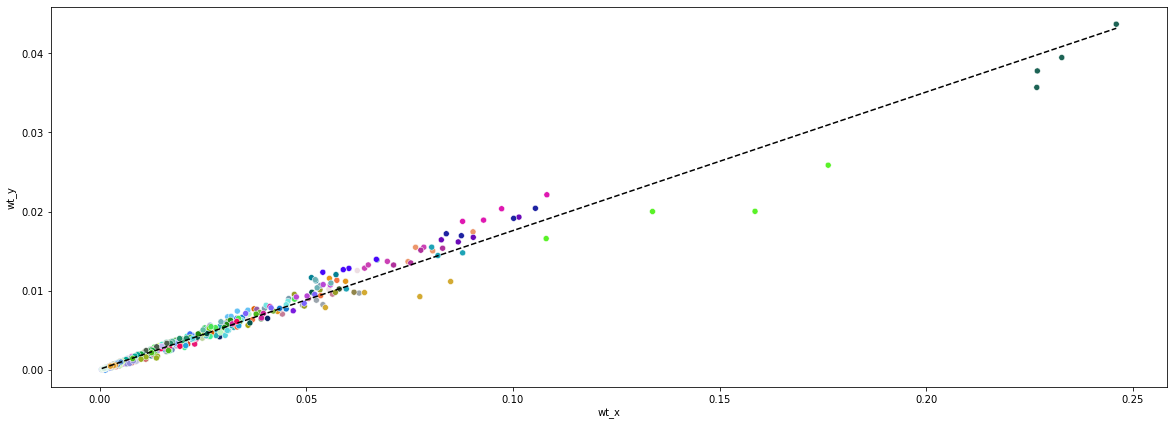

In [366]:
coef, const = utils.fit_ols("wt", df_compare)
utils.plot_scatter("wt", coef, const, df_compare, dict_map_colors)

/Users/victorgraff/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/Users/victorgraff/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


coef: 0.16963447988454966


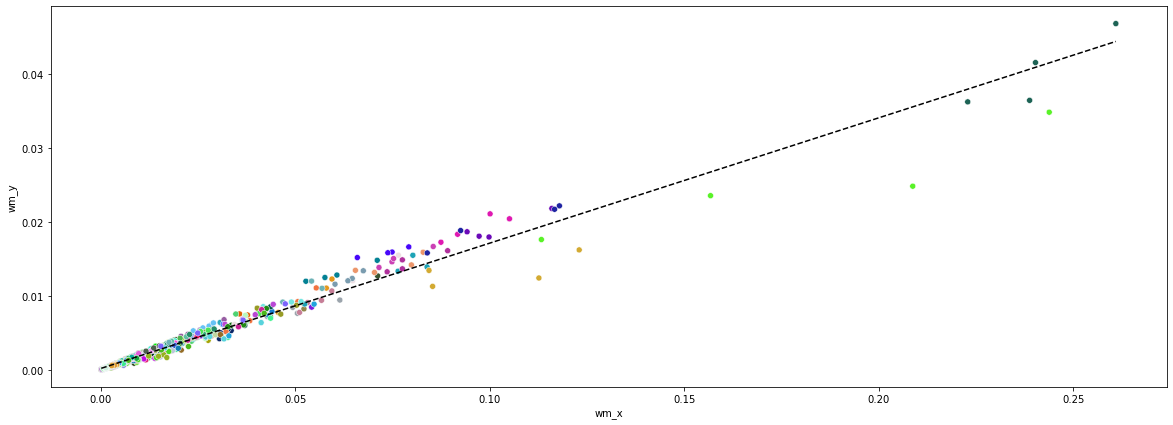

In [368]:
coef, const = utils.fit_ols("wm", df_compare)
utils.plot_scatter("wm", coef, const, df_compare, dict_map_colors)

In [567]:
ext_data = get_date_column(ext_data)

## Economical concepts processing

In [569]:
emp = prepare_concept(ext_data)
emp = np.log(add_countries_concept(emp, "emp"))

/var/folders/2d/fpqdm5v94c5f03vyb1t2slp40000gn/T/ipykernel_6225/3213717369.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["year"] = ext_data["year"]
/var/folders/2d/fpqdm5v94c5f03vyb1t2slp40000gn/T/ipykernel_6225/3213717369.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["month"] = ext_data["quarter"].map({"1": 1, "2": 4, "3": 7, "4": 10})
/var/folders/2d/fpqdm5v94c5f03vyb1t2slp40000gn/T/ipykernel_6225/3213717369.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice 

In [570]:
unemp = prepare_concept(ext_data)
unemp = np.log(add_countries_concept(unemp, "unemp"))

/var/folders/2d/fpqdm5v94c5f03vyb1t2slp40000gn/T/ipykernel_6225/3213717369.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["year"] = ext_data["year"]
/var/folders/2d/fpqdm5v94c5f03vyb1t2slp40000gn/T/ipykernel_6225/3213717369.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["month"] = ext_data["quarter"].map({"1": 1, "2": 4, "3": 7, "4": 10})
/var/folders/2d/fpqdm5v94c5f03vyb1t2slp40000gn/T/ipykernel_6225/3213717369.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice 

In [571]:
realgdp = prepare_concept(ext_data)
realgdp = np.log(add_countries_concept(realgdp, "realgdp"))

/var/folders/2d/fpqdm5v94c5f03vyb1t2slp40000gn/T/ipykernel_6225/3213717369.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["year"] = ext_data["year"]
/var/folders/2d/fpqdm5v94c5f03vyb1t2slp40000gn/T/ipykernel_6225/3213717369.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["month"] = ext_data["quarter"].map({"1": 1, "2": 4, "3": 7, "4": 10})
/var/folders/2d/fpqdm5v94c5f03vyb1t2slp40000gn/T/ipykernel_6225/3213717369.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice 

In [572]:
indprod = prepare_concept(ext_data)
indprod = np.log(add_countries_concept(indprod, "indprod"))

/var/folders/2d/fpqdm5v94c5f03vyb1t2slp40000gn/T/ipykernel_6225/3213717369.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["year"] = ext_data["year"]
/var/folders/2d/fpqdm5v94c5f03vyb1t2slp40000gn/T/ipykernel_6225/3213717369.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["month"] = ext_data["quarter"].map({"1": 1, "2": 4, "3": 7, "4": 10})
/var/folders/2d/fpqdm5v94c5f03vyb1t2slp40000gn/T/ipykernel_6225/3213717369.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice 

In [573]:
def get_detrend(df, list_countries):
    # 4th diff detrending
    diff = df.diff(4)
    # HP filter, realized column by column
    hp = utils.get_hp(df, list_countries)
    # residuals detrending: compute residuals on regression against time, squared time and quarterly dummies
    residuals = utils.get_df_residuals(df, list_countries)
    return diff, hp, residuals

def get_correlations(df, list_countries, concept):
    mapping_dict = {"emp": "e", "unemp": "u", "realgdp": "y", "indprod": "i"}
    
    diff, hp, residuals = get_detrend(df, list_countries)
    
    corr_hp = utils.get_concept_corr(hp, f"s{mapping_dict[concept]}", list_countries)
    corr_df = utils.get_concept_corr(diff, f"d{mapping_dict[concept]}", list_countries)
    corr_residuals = utils.get_concept_corr(residuals, f"t{mapping_dict[concept]}", list_countries)
    corr_raw = utils.get_concept_corr(df, f"{mapping_dict[concept]}", list_countries)
    
    corr = pd.merge(corr_hp, corr_df, on=["period", "country_1", "country_2"])
    corr = pd.merge(corr, corr_residuals, on=["period", "country_1", "country_2"])
    corr = pd.merge(corr, corr_raw, on=["period", "country_1", "country_2"])
    return corr

## De trending of each economical concept

In [578]:
unemp_diff, unemp_hp, unemp_residuals = get_detrend(unemp, list_countries)
emp_diff, emp_hp, emp_residuals = get_detrend(emp, list_countries)
realgdp_diff, realgdp_hp, realgdp_residuals = get_detrend(realgdp, list_countries)
indprod_diff, indprod_hp, indprod_residuals = get_detrend(indprod, list_countries)

/Users/victorgraff/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/Users/victorgraff/Documents/2022:2023 ENSAE/Cours/Statapps/utils.py:220: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_residuals[country] = (


In [579]:
corr_unemp = get_correlations(unemp, list_countries, "unemp")
corr_emp = get_correlations(emp, list_countries, "emp")
corr_realgdp = get_correlations(realgdp, list_countries, "realgdp")
corr_indprod = get_correlations(indprod, list_countries, "indprod")

## Aggregation of all correlation in a format ready for regressions

In [593]:
corr = pd.merge(corr_unemp, corr_emp, on=["period", "country_1", "country_2"])
corr = pd.merge(corr, corr_realgdp, on=["period", "country_1", "country_2"])
corr = pd.merge(corr, corr_indprod, on=["period", "country_1", "country_2"])
corr = pd.merge(corr, dy_df, on=["period", "country_1", "country_2"])

In [595]:
corr.to_csv("data_StatApp/processed_Data_extension.csv")